<a href="https://colab.research.google.com/github/Sitthirat/data_viz_2022/blob/main/health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree #decision tree
from sklearn.ensemble import RandomForestClassifier #RandomForestClassifier
from sklearn.metrics import classification_report 

In [3]:
from google.colab import drive   
drive.mount('/content/drive')
path = '/content/drive/My Drive/health'

Mounted at /content/drive


In [4]:
data_file_path = os.path.join(path,'cardio_train.csv')
data= pd.read_csv(data_file_path)    

In [5]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
data.isnull().sum()  #เช็คค่าว่าง

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
 data.cardio.value_counts() #เช็คค่าคำตอบในช่อง cardio

0    35021
1    34979
Name: cardio, dtype: int64

In [8]:
x = data[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']]
y = data['cardio']

#Decision Tree

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.30)

In [10]:
print(len(x_test))
print(len(x_train))

21000
49000


In [11]:
Tree_model = tree.DecisionTreeClassifier()

In [12]:
Tree_model.fit(x_train,y_train)  #สร้างสำหรับตัวเรียนรู้

DecisionTreeClassifier()

In [13]:
Tree_model.score(x_train,y_train)

0.9998979591836735

In [14]:
Tree_model.score(x_test,y_test) #มีความแม่นยำ 63.338 %

0.6345238095238095

[Text(0.6064464839052489, 0.9912280701754386, 'X[4] <= 129.5\ngini = 0.5\nsamples = 49000\nvalue = [24489, 24511]'),
 Text(0.40174332233752674, 0.9736842105263158, 'X[0] <= 19939.5\ngini = 0.435\nsamples = 28949\nvalue = [19710, 9239]'),
 Text(0.2503560866958118, 0.956140350877193, 'X[6] <= 2.5\ngini = 0.364\nsamples = 17792\nvalue = [13535, 4257]'),
 Text(0.1503394930653256, 0.9385964912280702, 'X[0] <= 16515.5\ngini = 0.348\nsamples = 17033\nvalue = [13211, 3822]'),
 Text(0.05660317717147155, 0.9210526315789473, 'X[6] <= 1.5\ngini = 0.257\nsamples = 5288\nvalue = [4487, 801]'),
 Text(0.03388585831527014, 0.9035087719298246, 'X[4] <= 114.5\ngini = 0.236\nsamples = 4777\nvalue = [4123, 654]'),
 Text(0.017042849619818664, 0.8859649122807017, 'X[5] <= 145.0\ngini = 0.166\nsamples = 1993\nvalue = [1811, 182]'),
 Text(0.016940979137492273, 0.868421052631579, 'X[3] <= 85.5\ngini = 0.164\nsamples = 1991\nvalue = [1811, 180]'),
 Text(0.009140164879962201, 0.8508771929824561, 'X[2] <= 192.5\ng

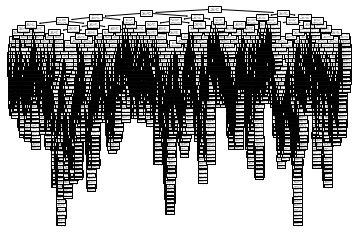

In [15]:
tree.plot_tree(Tree_model)

#Random Forest

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [17]:
 random_forest= RandomForestClassifier(n_estimators=70000) 

In [ ]:
random_forest.fit(x_train, y_train)

In [ ]:
random_forest.score(x_train,y_train)

In [ ]:
random_forest_predict = random_forest.predict(x_test)

In [ ]:
random_forest.score(x_test,y_test)

In [ ]:
print(random_forest_predict)

In [ ]:
print(classification_report(y_test,random_forest_predict ))  